<a href="https://colab.research.google.com/github/HCelante/Machine_Learning/blob/binary_classifier_by_threshold/Classifica%C3%A7%C3%A3o_por_Limiar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Classificação por Limiar

## A base de dados


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!sh ls

sh: 0: Can't open ls


In [17]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/iris_2class.csv')
df.head()
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especie
0,7.0,3.2,4.7,1.4,versicolor
1,6.4,3.2,4.5,1.5,versicolor
2,6.9,3.1,4.9,1.5,versicolor
3,5.5,2.3,4.0,1.3,versicolor
4,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
95,6.7,3.0,5.2,2.3,virginica
96,6.3,2.5,5.0,1.9,virginica
97,6.5,3.0,5.2,2.0,virginica
98,6.2,3.4,5.4,2.3,virginica


# Análise dos dados

Conhecer os dados é importante para projetar qualquer classificador. Esta análise serve para compreender a dificuldade do problema e possíveis métodos capazes de resolvê-lo.

In [12]:
df.groupby('especie').describe()

sepal length (cm)                        ... petal width (cm)               
                       count   mean       std  min  ...              25%  50%  75%  max
especie                                             ...                                
versicolor              50.0  5.936  0.516171  4.9  ...              1.2  1.3  1.5  1.8
virginica               50.0  6.588  0.635880  4.9  ...              1.8  2.0  2.3  2.5

[2 rows x 32 columns]

A partir das estatísticas calculadas para cada grupo, podemos verificar que a média de tamanho da sepa e da pétala é bem diferente entre elas. Sendo a 'virginica' o grupo de maior porte.

## Histograma

As características peso e altura são variáveis contínuas. Para compreender melhor a distribuição de uma característica podemos usar um histograma, que discretiza a distribuição dos valores em "baldes". Cada "balde" representa um intervalo dos valores e possui a contagem dos valores que estão naquele intervalo. Cada "balde" é representado por um gráfico de barras.

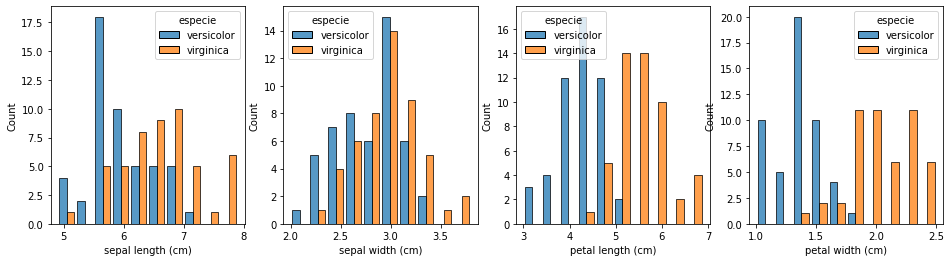

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,4))
sns.histplot(data=df, bins=10, x='sepal length (cm)', hue='especie', multiple='dodge', shrink=0.8, ax=axes[0])
sns.histplot(data=df, bins=10, x='sepal width (cm)', hue='especie', multiple='dodge', shrink=0.8,ax=axes[1])
sns.histplot(data=df, bins=10, x='petal length (cm)', hue='especie', multiple='dodge', shrink=0.8, ax=axes[2])
sns.histplot(data=df, bins=10, x='petal width (cm)', hue='especie', multiple='dodge', shrink=0.8,ax=axes[3])
plt.show()

O histograma da altura nos mostra que claramente a maioria das plantas da espécie 'virginica' tem pétalas com largura e comprimento menor que as pétalas da espécie 'versicolor'. Já sobre a sepa, a espécie virginica tende a ter um tamanho final maior.

## Scatterplot (gráfico de pontos)

Uma outra forma de conhecer o conjunto de dados é por meio de visualizações. Com estas ferramentas é possível ter uma idéia da separabilidade entre as classes e quais características que podem ser úteis para separá-las.

Como os objetos que queremos classificar tem apenas 2 características de entrada, é possível visualizá-los em um plano cartesiano 2D, onde cada característica é representada por um eixo coordenado. Para identificar cada ponto com sua classe podemos usar cores diferentes para cada uma.

### Sepa

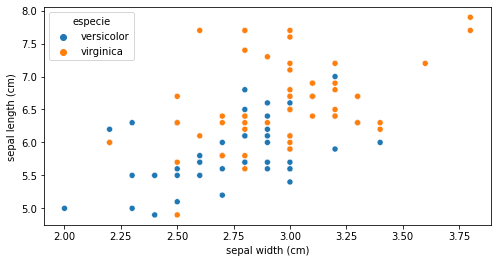

In [ ]:
plt.figure(figsize=(8,4))

sns.scatterplot(data=df, x='sepal width (cm)', y='sepal length (cm)', hue='especie')
plt.show()

### Pétala

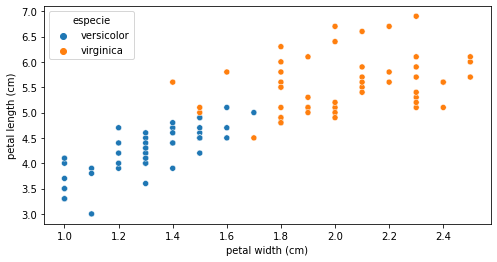

In [22]:
plt.figure(figsize=(8,4))

sns.scatterplot(data=df, x='petal width (cm)', y='petal length (cm)', hue='especie')
plt.show()

Conforme esperado, podemos ver que a característica das pétalas separa melhor as duas classes que queremos separar. Embora não dê para separar perfeitamente as 2 classes a partir da pétala, podemos ver que é possível separar os 2 conjuntos razoavelmente bem traçando uma reta em ``petal_length=4,90``:

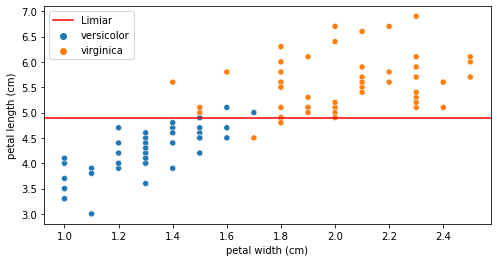

In [24]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='petal width (cm)', y='petal length (cm)', hue='especie')
plt.axhline(4.9, color='red', label='Limiar')
plt.legend()
plt.show()

O limiar *4,9* para o comprimento da pétala separa o espaço vetorial em duas regiões: o espaço que representa a espécie *virginica* e o espaço que representa a espécie *versicolor*. Este valor não foi escolhido ao acaso: a idéia é encontrar o valor que **melhor separa** os dois conjuntos de pontos, ou seja, que minimize o erro de predição.

# Classificador

Um classificador pode ser modelado matematicamente como uma função n-dimendional cujos argumentos são as características e a saída é um rótulo. Dado $\mathbf{x} \in \mathbb{R}^n$, onde $n$ é o número de características, e $C = \{c_0, c_1, \dots, c_m\}$ um conjunto de rótulos,  um classificador é uma função:

$$f: \mathbb{R}^n \mapsto C$$

## Classificador por limiar

No caso do problema que estamos trabalhando, $\mathbf{x} \in \mathbb{R}^2$, onde a primeira de dimensão de $\mathbf{x}$ é o comprimento da pétala, e a segunda é a largura. O conjunto dos rótulos $C$ é dado pelas 2 espécies que temos na base de dados: $C = ${virginica, versicolor}. Usando o limiar 4,9 para a característica *comprimento da pétala* e considerando o espaço visualizado no *scatterplot*, temos um classificador:

$$
f(\mathbf{x}) = 
\begin{cases}
    versicolor & \text{se } x[0] \leq 4,9 \\
    virginica   & \text{se } x[0] \gt 4,9
\end{cases}
$$

Note que este classificador utiliza apenas uma das 2 características (*comprimento da pétala*, que está na posição 0 do vetor **x**) para fazer a predição. Mais adiante iremos explorar como podemos combinar multiplas características.


In [44]:
def classificador_limiar(limiar, dados, rotulos=('versicolor', 'virginica')):
    resposta = []   
    for idx, dado in dados.iterrows():
        if dado[1] <= limiar:
            resposta.append(rotulos[0])
        else:
            resposta.append(rotulos[1])
    return pd.DataFrame(resposta, columns=['especie'])

#A implementação a seguir é mais eficiente e tem o mesmo resultado
# def classificador_limiar(limiar, dados, rotulos=('Futebol', 'Vôlei')):
#     def f(dado):
#         return rotulos[0] if dado[0] <= limiar else rotulos[1]
#     resposta = dados.apply(f, axis=1)
#     return resposta
    
    

In [45]:
predicoes = classificador_limiar(4.9, df[['petal width (cm)', 'petal length (cm)']])
for p in predicoes.values.flatten():
    print(p, end=", ")

versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, virginica, versicolor, versicolor, versicolor, versicolor, versicolor, virginica, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, virginica, virginica, virginica, virginica, virginica, virginica, versicolor, virginica, virginica, virginica, virginica, virginica, virginica, virginica, virginica, virginica, virginica, virginica, virginica, virginica, virginica, versicolor, virginica, versicolor, virginica, virginica, versicolor, versicolor, virginica, virginica, virginica, virginica, virginica, virginica, virginica, virginica, v

# Verificando o desempenho do classificador

É necessário medir o desempenho do classificador desenvolvido para ter uma idéia de sua assertividade.

In [46]:
#imprimir os esportes da base de dados, juntamente com as predições
predicoes = classificador_limiar(4.9, df[['petal width (cm)', 'petal length (cm)']])
for i in np.vstack([df['especie'].values, predicoes['especie'].values]).T:
    print(i)

['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'virginica']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'virginica']
['versicolor' 'versicolor']
['versicolor' 'versico

## Acurácia

Existem muitas medidas de desempenho de classificadores. Estas medidas são comumente conhecidas como métricas. Uma das métricas mais simples e intuitivas de classificação é chamada de **acurácia**. A acurácia é dada por:

$$
    \text{Acurácia} = \frac{\text{acertos}}{\text{total de instâncias}}
$$


In [47]:
def comparar_resultados(predicoes, gabarito, rotulo):
    predicoes = predicoes.values
    gabarito = gabarito.values
    acertos = 0
    erros = 0
    for i, gab in enumerate(gabarito):
        if gab == rotulo:
            if gab == predicoes[i]:
                acertos+=1
            else:
                erros+=1
    return acertos, erros

In [49]:
resultados_versicolor = comparar_resultados(predicoes['especie'], df['especie'], 'versicolor')
resultados_virginica = comparar_resultados(predicoes['especie'], df['especie'], 'virginica')

print("(versicolor) Acertos e Erros:", resultados_versicolor)
print("(virginica) Acertos e Erros:", resultados_virginica)

(versicolor) Acertos e Erros: (48, 2)
(virginica) Acertos e Erros: (44, 6)


Agora vamos calcular a acurácia do classificador para cada classe separadamente, e depois para o classificador de um modo geral. A vantagem da acurácia é que vamos ter um único número que vai nos descrever cada um destes cenários.

In [50]:
def acuracia(acertos, total_instancias):
    return acertos / total_instancias

print("Acurácia (versicolor): %.3f" % (acuracia(resultados_versicolor[0], resultados_versicolor[0] + resultados_versicolor[1]) ))
print("Acurácia (virginica): %.3f" % (acuracia(resultados_virginica[0], resultados_virginica[0] + resultados_virginica[1]) ))
total_de_instancias = len(predicoes)
print("Acurácia (Total): %.3f" % (acuracia(resultados_versicolor[0] + resultados_virginica[0], total_de_instancias) ))

Acurácia (versicolor): 0.960
Acurácia (virginica): 0.880
Acurácia (Total): 0.920


In [51]:

from sklearn.metrics import accuracy_score
print("Acurácia (Total) %.3f" % (accuracy_score(df['especie'], predicoes['especie'])))

Acurácia (Total) 0.920


O desempenho do classificador é diretamente relacionado com seus parâmetros. No caso do exemplo, o parâmetro do classificador é o limiar. 

Nós decidimos um valor para este limiar com base nas observações dos dados. Como o parâmetro do classificador foi escolhido manualmente, não podemos dizer que houve aprendizado de máquina até aqui.

Qual é o papel da aprendizagem neste contexto? "Aprender" significa encontrar um limar cada vez melhor, ou seja, otimizar o limiar de forma que o classificador erre o mínimo possível considerando suas limitações.

# Aprendizado do limiar por busca exaustiva

O algoritmo de aprendizado mais simples realiza uma busca exaustiva pelos parâmetros que otimizem alguma métrica. Esta técnica se chama busca exaustiva, ou busca em grade (*grid-search*). No exemplo que estamos estudando, a busca exaustiva testa uma lista de todos os limiares possíveis dentro de um intervalo, e retorna o limiar que maximiza a métrica de desempenho (como a acurácia, por exemplo).

Melhor limiar: 4.702, Melhor Acurácia: 0.930


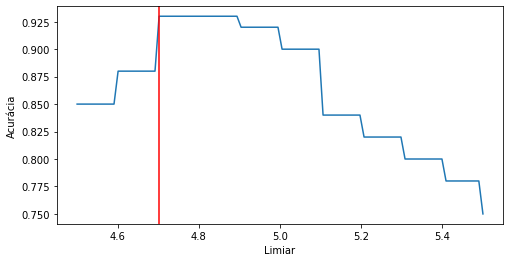

In [52]:
n_limiares = 100
limiares = np.linspace(4.5, 5.5, n_limiares)
acuracias = []

melhor_limiar = limiares[0]
melhor_acuracia = 0

dados = df[['petal width (cm)', 'petal length (cm)']]

for limiar in limiares:
    predicoes = classificador_limiar(limiar, dados)
    
    acuracia = accuracy_score(df['especie'], predicoes['especie'])
    acuracias.append(acuracia)
    
    if acuracia > melhor_acuracia:
        melhor_acuracia = acuracia
        melhor_limiar = limiar

print("Melhor limiar: %.3f, Melhor Acurácia: %.3f" % (melhor_limiar, melhor_acuracia))

fig, axes = plt.subplots(figsize=(8,4))
axes.plot(limiares, acuracias)
axes.axvline(melhor_limiar, color='red')
axes.set_xlabel('Limiar')
axes.set_ylabel('Acurácia')
plt.show()

A busca exaustiva pode encontrar bons resultados, mas depende da realização da classificação muitas vezes. A quantidade de vezes aumenta proporcionalmente a quantidade de valores a serem avaliados. No exemplo, avaliamos ``n_limiares`` valores linearmente espaçados entre 4,5 e 5,5. Quanto maior ``n_limiares`` maior a probabilidade de encontrar a melhor solução possível (a solução ótima). Entretanto, o custo da busca aumenta proporcionalmente.
